In [1]:
#################################################################################################################################################################################
# Purpose  : Data Engineering Final Exam
#            Analysis of the Paycheck Protection Program loans to understand the distribution of helping loans to businesses across the United States. 
#
# 
# Analysis: Step 1: a. Load into an indexed Pandas data frame the variables: Loan Amount, Borrower’s State, Date Approved and NAICS Code from all available PPP files
#                       (keep only two-digit NAICS).
#                   b. Add in the data frame a LoanProgram variable that takes the value “PPP” for all rows.
#
#           Step 2: a. Load into an indexed Pandas data frame the variables: ACTIONDATE, PRIMPLACEOFPERFORMANCECD, FACEVALUEOFDIRECTLOANORLOANGUARANTEE for all the EIDL loans.
#                   b. Create a new variable in the EIDL data frame that takes the value “EIDL” for all rows.
#                   c. Retrieve the State from the PRIMPLACEOFPERFORMANCECD variable.
#                   d. Merge the EIDL and PPP by State.
#
#           Step 3: a. Compute the total Number of Loans and Total Amount per State and NAICS code.
#                   b. Load the data into a Pandas data frame the variables "FIRMPDEMP" (number of firms) and "PAYANN" (annual emplyee pay) to normalize 
#                      the Number of Loans and Total Loan Amount.
#                   c. Plot two heat maps of the US by State, that show the normalized variables.
#
# In order to run this code you have to download all the PPP files from this link: https://data.sba.gov/dataset/ppp-foia. 
# These files contain information on a loan program from the US federal government in 2020, to help business pay their workers during the Covid-19 pandemic.
# After downloading, assign to the "folder_path" and "output_folder" variables, the folder path of the saved PPP Data.
#
# Next, download the EIDL data from SBA : https://data.sba.gov/dataset/covid-19-eidl.
# The EIDL is another US government program designed to help business recover from COVID impact.
# Those files will be inside of a zip file of the form april-2021-.... you have to unzip this folder and put all these 
# files into the folder where you have the PPP data.
# 
# You will not be able to run this code if you do not download all the necessary files and put them in the same folder.
# 
# Authors  : Grammenos Konstantinos, Kalatzi Marilena, Tsadimas Anargyros
# Professor: Kechagias Stefanos
# Date     : June 2024
##################################################################################################################################################################################

In [2]:
# import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1 ##
1. Load into an indexed Pandas data frame the variables: Loan Amount, Borrower’s State, Date Approved and NAICS Code from all available PPP files (keep only two-digit NAICS)

In [3]:
# Map variable types to later be correctly loaded
dtype_mapping = {'DateApproved'         : 'str', 
                 'BorrowerState'        : 'category',
                 'CurrentApprovalAmount': 'float32', 
                 'NAICSCode'            : 'str'
                }

In [4]:
# Select appropriate columns for analysis
selected_columns = ['DateApproved', 'BorrowerState', 'CurrentApprovalAmount', 'NAICSCode']

In [5]:
# Define the folder path where my PPP data are

folder_path = 'C:\\Users\\Mariloon\\Documents\\Desktop Backup\\MSc. Statistics\\Data Engineering\\Final Exam\\RawData'
output_folder = 'C:\\Users\\Mariloon\\Documents\\Desktop Backup\\MSc. Statistics\\Data Engineering\\Final Exam\\RawData'


def process_file(file_path, output_path):
    
    # Load the data with specified data types and only selected columns
    df = pd.read_csv(file_path, usecols=selected_columns, dtype=dtype_mapping)

    df['NAICSCode'] = df['NAICSCode'].str[:2].astype('category')

    # Save the sampled data of each file to a new CSV file
    df.to_csv(output_path, index=False)
    
    return df


In [6]:
# Create an empty list to fill with each file
results = []

# list of files to work with
csv_files = [f"public_up_to_150k_{i}_230930.csv" for i in range(1, 13)]
csv_files = [os.path.join(folder_path, f) for f in csv_files]

In [7]:
# Process each file
for file_path in csv_files:
    output_path = os.path.join(output_folder, f'sampled_{os.path.basename(file_path)}')
    df = process_file(file_path, output_path)
    results.append(df)

# Concatenate all DataFrames in the results list into a single DataFrame
combined_df = pd.concat(results)

2. Add in the data frame a LoanProgram variable that takes the value “PPP” for all rows.

In [8]:
# Add the LoanProgram column in the df. This column will have the value "PPP" in each row
combined_df['LoanProgram'] = 'PPP'

In [9]:
# Display the first few rows of the final DataFrame
print(combined_df.head(10))

  DateApproved BorrowerState  CurrentApprovalAmount NAICSCode LoanProgram
0   01/22/2021           NaN          149360.593750        62         PPP
1   05/01/2020           NaN          148440.000000        33         PPP
2   05/01/2020           NaN          140081.781250       NaN         PPP
3   05/01/2020           NaN          136520.953125        54         PPP
4   04/28/2020           NaN          130600.000000        62         PPP
5   05/01/2020           NaN          126798.000000       NaN         PPP
6   05/01/2020           NaN          125916.000000        99         PPP
7   05/01/2020           NaN          111200.000000        33         PPP
8   05/01/2020           NaN          109988.000000        23         PPP
9   05/01/2020           NaN          100000.000000        62         PPP


In [10]:
# Clean 'BorrowerState' colunm from missing values
# Inspect the first 153 rows
print("First 153 rows of the DataFrame:")
print(combined_df.head(153))

# Check for NaN values in 'BorrowerState' after the 153rd row
nan_after_153 = combined_df.iloc[153:]['BorrowerState'].isna().sum()
total_after_153 = combined_df.iloc[153:].shape[0]
nan_percentage_after_153 = (nan_after_153 / total_after_153) * 100

print(f"\nTotal rows after the 153rd row: {total_after_153}")
print(f"Rows with NaN in 'BorrowerState' after the 153rd row: {nan_after_153} ({nan_percentage_after_153:.2f}%)")

First 153 rows of the DataFrame:
    DateApproved BorrowerState  CurrentApprovalAmount NAICSCode LoanProgram
0     01/22/2021           NaN          149360.593750        62         PPP
1     05/01/2020           NaN          148440.000000        33         PPP
2     05/01/2020           NaN          140081.781250       NaN         PPP
3     05/01/2020           NaN          136520.953125        54         PPP
4     04/28/2020           NaN          130600.000000        62         PPP
..           ...           ...                    ...       ...         ...
148   05/01/2020           NaN            2445.000000        56         PPP
149   05/21/2020           NaN            2194.000000        56         PPP
150   05/01/2020           NaN            2125.000000        54         PPP
151   02/16/2021           NaN             856.000000        49         PPP
152   06/02/2020            AE           27400.000000        54         PPP

[153 rows x 5 columns]

Total rows after the 153rd row

In [11]:
# Remove the first 153 rows of BorrowerState
cleaned_df = combined_df.iloc[153:]

# Verify the removal
print("First few rows after removal:")
print(cleaned_df.head())

# Check the shape of the cleaned DataFrame to confirm the rows have been removed
print("\nShape of the cleaned DataFrame:", cleaned_df.shape)

First few rows after removal:
    DateApproved BorrowerState  CurrentApprovalAmount NAICSCode LoanProgram
153   05/14/2021            AE           20000.000000        81         PPP
154   02/06/2021            AE           13125.000000        54         PPP
155   04/13/2021            AE            3462.000000        56         PPP
156   03/25/2021            AK          149997.000000        72         PPP
157   02/18/2021            AK          149946.671875        81         PPP

Shape of the cleaned DataFrame: (10499621, 5)


In [12]:
# Reset index and drop the existing index
cleaned_df = cleaned_df.reset_index(drop=True)

# Set the new index starting from 1
cleaned_df.index = cleaned_df.index + 1

In [13]:
print(cleaned_df)

         DateApproved BorrowerState  CurrentApprovalAmount NAICSCode  \
1          05/14/2021            AE           20000.000000        81   
2          02/06/2021            AE           13125.000000        54   
3          04/13/2021            AE            3462.000000        56   
4          03/25/2021            AK          149997.000000        72   
5          02/18/2021            AK          149946.671875        81   
...               ...           ...                    ...       ...   
10499617   05/01/2020            WY             260.000000        62   
10499618   03/24/2021            WY             256.450012        11   
10499619   05/01/2021            WY             250.000000        11   
10499620   03/20/2021            WY             250.000000        53   
10499621   03/20/2021            WY             236.020004        11   

         LoanProgram  
1                PPP  
2                PPP  
3                PPP  
4                PPP  
5                PPP

In [14]:
# Convert 'DateApproved' to proper dates
cleaned_df['DateApproved'] = pd.to_datetime(cleaned_df['DateApproved'], errors='coerce')

## Task 2 ##
1. Load into an indexed Pandas data frame the variables: ACTIONDATE, PRIMPLACEOFPERFORMANCECD, FACEVALUEOFDIRECTLOANORLOANGUARANTEE for all the EIDL loans.

In [15]:
# Map variable types to later be correctly loaded
dtype_mapping_eidl = {'ACTIONDATE'                          : 'str', 
                      'PRIMPLACEOFPERFORMANCECD'            : 'str',
                      'FACEVALUEOFDIRECTLOANORLOANGUARANTEE': 'float32'
                     }

In [16]:
# Select appropriate columns for analysis
selected_columns_eidl = ['ACTIONDATE', 'PRIMPLACEOFPERFORMANCECD', 'FACEVALUEOFDIRECTLOANORLOANGUARANTEE']

In [17]:
def process_file_eidl(file_path, output_path):
    
    # Load the data with specified data types and only selected columns
    df = pd.read_csv(file_path, usecols=selected_columns_eidl, dtype=dtype_mapping_eidl)

    # Save the sampled data of each file to a new CSV file
    df.to_csv(output_path, index=False)
    
    return df


In [18]:
# Assign the names of the csv files to load, in variable "csv_files_eidl" 
csv_files_eidl = [
    'DATAACT_EIDL_LOANS_20200401-20200609.csv',
    'DATAACT_EIDL_LOANS_20200610-20200625.csv',
    'DATAACT_EIDL_LOANS_20200626-20200723.csv',
    'DATAACT_EIDL_LOANS_20200724-20201115.csv',
    'DATAACT_EIDL_LOANS_DMCS2.0.csv'
]
csv_files_eidl = [os.path.join(folder_path, f) for f in csv_files_eidl]

In [19]:
# Process each file 
results_eidl = []
for file_path in csv_files_eidl:
    output_path = os.path.join(output_folder, f'sampled_{os.path.basename(file_path)}.csv')
    df2 = process_file_eidl(file_path, output_path)
    results_eidl.append(df2)

In [20]:
# Concatenate all DataFrames in the results list into a single DataFrame
eidl_df = pd.concat(results_eidl)

In [21]:
# Save the concatenated DataFrame to a new csv file
eidl_output_path = os.path.join(output_folder, 'concatenated_eidl_data.csv')
eidl_df.to_csv(eidl_output_path, index=False)

In [22]:
print(eidl_df)

     ACTIONDATE PRIMPLACEOFPERFORMANCECD  FACEVALUEOFDIRECTLOANORLOANGUARANTEE
0      20200514                  GA**121                               65300.0
1      20200514                  ID**049                              150000.0
2      20200511                  TX**439                              150000.0
3      20200515                  CA**059                               48700.0
4      20200512                  WI**043                              150000.0
...         ...                      ...                                   ...
2823   20201114                  OH**049                               80500.0
2824   20201114                  CA**037                                6200.0
2825   20201114                  TX**439                               34300.0
2826   20201114                  NH**009                               33400.0
2827   20201114                  TX**085                               60100.0

[3766274 rows x 3 columns]


In [23]:
# Convert ACTIONDATE to formal date format
eidl_df['ACTIONDATE'] = pd.to_datetime(eidl_df['ACTIONDATE'], format='%Y%m%d', errors='coerce')

In [24]:
# Display changes
print(eidl_df)
eidl_df = eidl_df.reset_index(drop=True)

     ACTIONDATE PRIMPLACEOFPERFORMANCECD  FACEVALUEOFDIRECTLOANORLOANGUARANTEE
0    2020-05-14                  GA**121                               65300.0
1    2020-05-14                  ID**049                              150000.0
2    2020-05-11                  TX**439                              150000.0
3    2020-05-15                  CA**059                               48700.0
4    2020-05-12                  WI**043                              150000.0
...         ...                      ...                                   ...
2823 2020-11-14                  OH**049                               80500.0
2824 2020-11-14                  CA**037                                6200.0
2825 2020-11-14                  TX**439                               34300.0
2826 2020-11-14                  NH**009                               33400.0
2827 2020-11-14                  TX**085                               60100.0

[3766274 rows x 3 columns]


In [25]:
# Set index of eidl_df to match the one of cleaned_df
eidl_df.index = eidl_df.index + 1

In [26]:
# Display changes
print(eidl_df)

        ACTIONDATE PRIMPLACEOFPERFORMANCECD  \
1       2020-05-14                  GA**121   
2       2020-05-14                  ID**049   
3       2020-05-11                  TX**439   
4       2020-05-15                  CA**059   
5       2020-05-12                  WI**043   
...            ...                      ...   
3766270 2020-11-14                  OH**049   
3766271 2020-11-14                  CA**037   
3766272 2020-11-14                  TX**439   
3766273 2020-11-14                  NH**009   
3766274 2020-11-14                  TX**085   

         FACEVALUEOFDIRECTLOANORLOANGUARANTEE  
1                                     65300.0  
2                                    150000.0  
3                                    150000.0  
4                                     48700.0  
5                                    150000.0  
...                                       ...  
3766270                               80500.0  
3766271                                6200.0  
376

2. Create a new variable in the EIDL data frame that takes the value “EIDL” for all rows

In [27]:
# Add the LoanProgram column
eidl_df['LoanProgram'] = 'EIDL'

3. Retrieve the State from the PRIMPLACEOFPERFORMANCECD variable

In [28]:
# Extract the state code from 'PRIMPLACEOFPERFORMANCECD'
eidl_df['State'] = eidl_df['PRIMPLACEOFPERFORMANCECD'].str[:2]

In [29]:
# Drop the 'PRIMPLACEOFPERFORMANCECD' column from eidl_df
eidl_df = eidl_df.drop(columns=['PRIMPLACEOFPERFORMANCECD'])

4. Merge the EIDL and PPP by State

In [30]:
# Rename columns to of cleaned_df and eidl_df to more user friendly names
cleaned_df = cleaned_df.rename(
    columns={
        'DateApproved'                          : 'Date',
        'CurrentApprovalAmount'                 : 'LoanAmount',
        'BorrowerState'                         : 'State'
    }
)

eidl_df = eidl_df.rename(
    columns={
        'ACTIONDATE'                          : 'Date',
        'FACEVALUEOFDIRECTLOANORLOANGUARANTEE': 'LoanAmount'
    }
)

In [31]:
print(cleaned_df)
print(eidl_df)

               Date State     LoanAmount NAICSCode LoanProgram
1        2021-05-14    AE   20000.000000        81         PPP
2        2021-02-06    AE   13125.000000        54         PPP
3        2021-04-13    AE    3462.000000        56         PPP
4        2021-03-25    AK  149997.000000        72         PPP
5        2021-02-18    AK  149946.671875        81         PPP
...             ...   ...            ...       ...         ...
10499617 2020-05-01    WY     260.000000        62         PPP
10499618 2021-03-24    WY     256.450012        11         PPP
10499619 2021-05-01    WY     250.000000        11         PPP
10499620 2021-03-20    WY     250.000000        53         PPP
10499621 2021-03-20    WY     236.020004        11         PPP

[10499621 rows x 5 columns]
              Date  LoanAmount LoanProgram State
1       2020-05-14     65300.0        EIDL    GA
2       2020-05-14    150000.0        EIDL    ID
3       2020-05-11    150000.0        EIDL    TX
4       2020-05-15 

In [32]:
# Ensure the column order matches
eidl_df = eidl_df[['Date', 'State', 'LoanAmount', 'LoanProgram']]

In [33]:
print(cleaned_df)
print(eidl_df)

               Date State     LoanAmount NAICSCode LoanProgram
1        2021-05-14    AE   20000.000000        81         PPP
2        2021-02-06    AE   13125.000000        54         PPP
3        2021-04-13    AE    3462.000000        56         PPP
4        2021-03-25    AK  149997.000000        72         PPP
5        2021-02-18    AK  149946.671875        81         PPP
...             ...   ...            ...       ...         ...
10499617 2020-05-01    WY     260.000000        62         PPP
10499618 2021-03-24    WY     256.450012        11         PPP
10499619 2021-05-01    WY     250.000000        11         PPP
10499620 2021-03-20    WY     250.000000        53         PPP
10499621 2021-03-20    WY     236.020004        11         PPP

[10499621 rows x 5 columns]
              Date State  LoanAmount LoanProgram
1       2020-05-14    GA     65300.0        EIDL
2       2020-05-14    ID    150000.0        EIDL
3       2020-05-11    TX    150000.0        EIDL
4       2020-05-15 

In [34]:
# Concatenate the DataFrames
loans_df = pd.concat([cleaned_df, eidl_df], ignore_index=True)

# Display the combined DataFrame
print(loans_df)

               Date State     LoanAmount NAICSCode LoanProgram
0        2021-05-14    AE   20000.000000        81         PPP
1        2021-02-06    AE   13125.000000        54         PPP
2        2021-04-13    AE    3462.000000        56         PPP
3        2021-03-25    AK  149997.000000        72         PPP
4        2021-02-18    AK  149946.671875        81         PPP
...             ...   ...            ...       ...         ...
14265890 2020-11-14    OH   80500.000000       NaN        EIDL
14265891 2020-11-14    CA    6200.000000       NaN        EIDL
14265892 2020-11-14    TX   34300.000000       NaN        EIDL
14265893 2020-11-14    NH   33400.000000       NaN        EIDL
14265894 2020-11-14    TX   60100.000000       NaN        EIDL

[14265895 rows x 5 columns]


## Task 3 ##
1. Compute the total Number of Loans and Total Amount per State and NAICS code.

In [35]:
# Group the "loans_df" by 'State' and 'NAICSCode' and compute the total number of loans and total amount for each state, in a new DataFrame
grouped_combined_state = loans_df.groupby(['State','NAICSCode']).agg(
    LoanNumber  = ('LoanAmount', 'count'),  # Count the number of loans
    TotalAmount = ('LoanAmount', 'sum')  # Sum the loan amounts
).reset_index()

# Display the result
print(grouped_combined_state)

C:\Users\Yasir\AppData\Local\Temp\ipykernel_20928\299727544.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_combined_state = loans_df.groupby(['State','NAICSCode']).agg(


     State NAICSCode  LoanNumber  TotalAmount
0       59        11           0          0.0
1       59        21           0          0.0
2       59        22           0          0.0
3       59        23           0          0.0
4       59        31           0          0.0
...    ...       ...         ...          ...
1495    WY        71         589   13860260.0
1496    WY        72        1623   68951856.0
1497    WY        81        2426   53311648.0
1498    WY        92          63    2359421.0
1499    WY        99          74    1987132.5

[1500 rows x 4 columns]


In [36]:
# Our DataFrame also contains navy bases of the US. To continue with the analysis, keep only US States.
# List the US States
actual_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 
                 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 
                 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC']

# Filter the DataFrame to keep only actual states
grouped_combined_state = grouped_combined_state[grouped_combined_state['State'].isin(actual_states)]

In [37]:
# Display changes
print(grouped_combined_state)

     State NAICSCode  LoanNumber   TotalAmount
75      AK        11        3922  1.150438e+08
76      AK        21          73  3.166842e+06
77      AK        22          20  1.302001e+06
78      AK        23        2118  8.296072e+07
79      AK        31         213  7.304048e+06
...    ...       ...         ...           ...
1495    WY        71         589  1.386026e+07
1496    WY        72        1623  6.895186e+07
1497    WY        81        2426  5.331165e+07
1498    WY        92          63  2.359421e+06
1499    WY        99          74  1.987132e+06

[1275 rows x 4 columns]


In [38]:
# Reset index
grouped_combined_state = grouped_combined_state.reset_index(drop=True) 

In [39]:
# Set index to start from 1
grouped_combined_state.index = grouped_combined_state.index + 1

2. Load the US Census’s Annual Business Survey data into a Pandas data frame and use the variables "FIRMPDEMP" (number of firms), "PAYANN" (annual payroll) and "EMP" (number of employees)  to normalize the Number of Loans and Total Loan Amount.

In [40]:
# Define the columns to be used
cols = ['FIRMPDEMP', 'PAYANN', 'NAME', 'NAICS2017','EMP']

In [41]:
# Map the columns accordingly
map_census_cols = {'FIRMPDEMP': 'str',
                   'NAME'     : 'str',
                   'NAICS2017': 'str',
                   'PAYANN'   : 'str',
                   'EMP'      : 'str'
                  }

In [42]:
# Load the ABS data
census_df = pd.read_csv('C:\\Users\\Mariloon\\Documents\\Desktop Backup\\MSc. Statistics\\Data Engineering\\Final Exam\\RawData\\ABSCS2021.AB2100CSA01-Data.csv',usecols = cols,dtype = map_census_cols, low_memory=False)

In [43]:
# Display the census DataFrame
print(census_df)

                        NAME        NAICS2017                 FIRMPDEMP  \
0       Geographic Area Name  2017 NAICS code  Number of employer firms   
1                    Alabama               00                     70218   
2                    Alabama               00                     12234   
3                    Alabama               00                     45451   
4                    Alabama               00                      7977   
...                      ...              ...                       ...   
127394               Wyoming               99                         S   
127395               Wyoming               99                         S   
127396               Wyoming               99                        63   
127397               Wyoming               99                        83   
127398               Wyoming               99                         3   

                        EMP                   PAYANN  
0       Number of employees  Annual payroll 

In [44]:
# Convert column types to numeric
census_df['FIRMPDEMP'] = pd.to_numeric(census_df['FIRMPDEMP'], errors='coerce')
census_df['PAYANN'] = pd.to_numeric(census_df['PAYANN'], errors='coerce')
census_df['EMP'] = pd.to_numeric(census_df['EMP'], errors='coerce')

In [45]:
print(census_df)

                        NAME        NAICS2017  FIRMPDEMP        EMP  \
0       Geographic Area Name  2017 NAICS code        NaN        NaN   
1                    Alabama               00    70218.0  1646723.0   
2                    Alabama               00    12234.0   131001.0   
3                    Alabama               00    45451.0   697919.0   
4                    Alabama               00     7977.0    69855.0   
...                      ...              ...        ...        ...   
127394               Wyoming               99        NaN        NaN   
127395               Wyoming               99        NaN        NaN   
127396               Wyoming               99       63.0      151.0   
127397               Wyoming               99       83.0      175.0   
127398               Wyoming               99        3.0       11.0   

            PAYANN  
0              NaN  
1       83863653.0  
2        5102506.0  
3       33959997.0  
4        2601361.0  
...            ...  


In [46]:
# Clean census DataFrame from missing values
census_df_cleaned = census_df.dropna()

In [47]:
print(census_df_cleaned)

           NAME NAICS2017  FIRMPDEMP        EMP      PAYANN
1       Alabama        00    70218.0  1646723.0  83863653.0
2       Alabama        00    12234.0   131001.0   5102506.0
3       Alabama        00    45451.0   697919.0  33959997.0
4       Alabama        00     7977.0    69855.0   2601361.0
5       Alabama        00     1177.0    14650.0    572673.0
...         ...       ...        ...        ...         ...
127389  Wyoming        99       66.0      158.0      4678.0
127391  Wyoming        99        6.0        5.0       189.0
127396  Wyoming        99       63.0      151.0      4519.0
127397  Wyoming        99       83.0      175.0      5193.0
127398  Wyoming        99        3.0       11.0      1216.0

[57962 rows x 5 columns]


In [48]:
# Rename census DataFrame columns to match the previous DataFrames
census_df_cleaned = census_df_cleaned.rename(
    columns = {
        'NAME'     : 'State',
        'NAICS2017': 'NAICSCode',
        'FIRMPDEMP': 'FirmNumber',
        'EMP'      : 'EmployeesNumber',
        'PAYANN'   : 'AnnualPay'
    }
)

In [49]:
# Map State abbreviatins
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Convert State names to abbreviations in the first DataFrame
census_df_cleaned['State'] = census_df_cleaned['State'].map(state_abbreviations)

In [50]:
# Group census data by 'State' and 'NAICSCode'
grouped_census_data = census_df_cleaned.groupby(['State','NAICSCode']).agg(
    TotalFirms      = ('FirmNumber', 'sum'),  # Count the number of loans
    TotalPayroll    = ('AnnualPay', 'sum'),  # Sum the loan amounts
    TotalEmployees  = ('EmployeesNumber', 'sum')
).reset_index()

In [51]:
print(grouped_census_data)

     State NAICSCode  TotalFirms  TotalPayroll  TotalEmployees
0       AK        00    261379.0   145742621.0       2250915.0
1       AK   11(660)      4135.0      262489.0          1121.0
2       AK        21      1462.0     9513079.0         53625.0
3       AK        22       513.0      548542.0          5743.0
4       AK        23     43607.0    18208722.0        211687.0
...    ...       ...         ...           ...             ...
1042    WY        62     21149.0     8132374.0        181619.0
1043    WY        71      5295.0      524888.0         28385.0
1044    WY        72     14490.0     7628333.0        312602.0
1045    WY   81(663)     12642.0     2433576.0         51872.0
1046    WY        99      1425.0       96309.0          3176.0

[1047 rows x 5 columns]


In [52]:
# Merge the PPP and EIDL DataFrame with the census DataFrame
merged_data = pd.merge(grouped_combined_state, grouped_census_data, on=['State','NAICSCode'])

In [53]:
print(merged_data)

    State NAICSCode  LoanNumber   TotalAmount  TotalFirms  TotalPayroll  \
0      AK        21          73  3.166842e+06      1462.0     9513079.0   
1      AK        22          20  1.302001e+06       513.0      548542.0   
2      AK        23        2118  8.296072e+07     43607.0    18208722.0   
3      AK        42         322  1.127256e+07      7315.0     5690460.0   
4      AK        51         163  5.539186e+06      2207.0     2013125.0   
..    ...       ...         ...           ...         ...           ...   
694    WY        61         263  6.258467e+06       349.0      123499.0   
695    WY        62        1814  6.406121e+07     21149.0     8132374.0   
696    WY        71         589  1.386026e+07      5295.0      524888.0   
697    WY        72        1623  6.895186e+07     14490.0     7628333.0   
698    WY        99          74  1.987132e+06      1425.0       96309.0   

     TotalEmployees  
0           53625.0  
1            5743.0  
2          211687.0  
3          

In [54]:
# Create a new column in the "merged_data" DataFrame that contains the normalized total amount per employees (divide TotalAmount with TotalEmployees)
merged_data['NormalizedTotalAmountPerEmployees'] = merged_data['TotalAmount'] / merged_data['TotalEmployees']

In [55]:
# Create a new column in the "merged_data" DataFrame that contains the normalized loan number (divide LoanNumber with TotalFirms)
merged_data['NormalizedLoanNumber'] = merged_data['LoanNumber'] / merged_data['TotalFirms']

In [56]:
# Create a new column in the "merged_data" DataFrame that contains the normalized total amount per payroll (divide TotalAmount with TotalPayroll)
merged_data['NormalizedTotalAmountPerPayroll'] = merged_data['TotalAmount'] / merged_data['TotalPayroll']

In [57]:
# Display changes
print(merged_data)

    State NAICSCode  LoanNumber   TotalAmount  TotalFirms  TotalPayroll  \
0      AK        21          73  3.166842e+06      1462.0     9513079.0   
1      AK        22          20  1.302001e+06       513.0      548542.0   
2      AK        23        2118  8.296072e+07     43607.0    18208722.0   
3      AK        42         322  1.127256e+07      7315.0     5690460.0   
4      AK        51         163  5.539186e+06      2207.0     2013125.0   
..    ...       ...         ...           ...         ...           ...   
694    WY        61         263  6.258467e+06       349.0      123499.0   
695    WY        62        1814  6.406121e+07     21149.0     8132374.0   
696    WY        71         589  1.386026e+07      5295.0      524888.0   
697    WY        72        1623  6.895186e+07     14490.0     7628333.0   
698    WY        99          74  1.987132e+06      1425.0       96309.0   

     TotalEmployees  NormalizedTotalAmountPerEmployees  NormalizedLoanNumber  \
0           53625.0

In [1]:
filtered_data = merged_data[(merged_data['NAICSCode'] == '71') & (merged_data['State'].isin(['MI', 'NC']))]

NameError: name 'merged_data' is not defined

3. Plot two heat maps of the US by State, that show the normalized variables.

In [2]:
# Create the first heatmap for Normalized Loan Number by Employees
plt.figure(figsize=(10, 20))
heatmap_data_count = merged_data.pivot_table(values='NormalizedLoanNumber', index='State', aggfunc='mean')
ax = sns.heatmap(heatmap_data_count, cmap='viridis', annot=True, linewidths=.5, cbar_kws={'label': 'Normalized Loan Number by Number of Firms'}, annot_kws={"size": 16})
plt.xlabel('')
plt.ylabel('State', fontsize=20)  # Increase the fontsize for y-axis label
plt.xticks([])
plt.yticks(fontsize=16, rotation=0)  # Set the rotation to 0 to display the state names horizontally
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Normalized Loan Number by Number of Firms', fontsize=20) 

# Save the plot as a JPG image
output_path = 'C:\\Users\\kosti\\OneDrive\\Desktop\\Data Engineering\\Homework2\\CovidRecovery\\RawData\\normalized_loan_number_heatmap.jpg'
plt.savefig(output_path, bbox_inches='tight', format='jpg')
plt.show()

NameError: name 'plt' is not defined

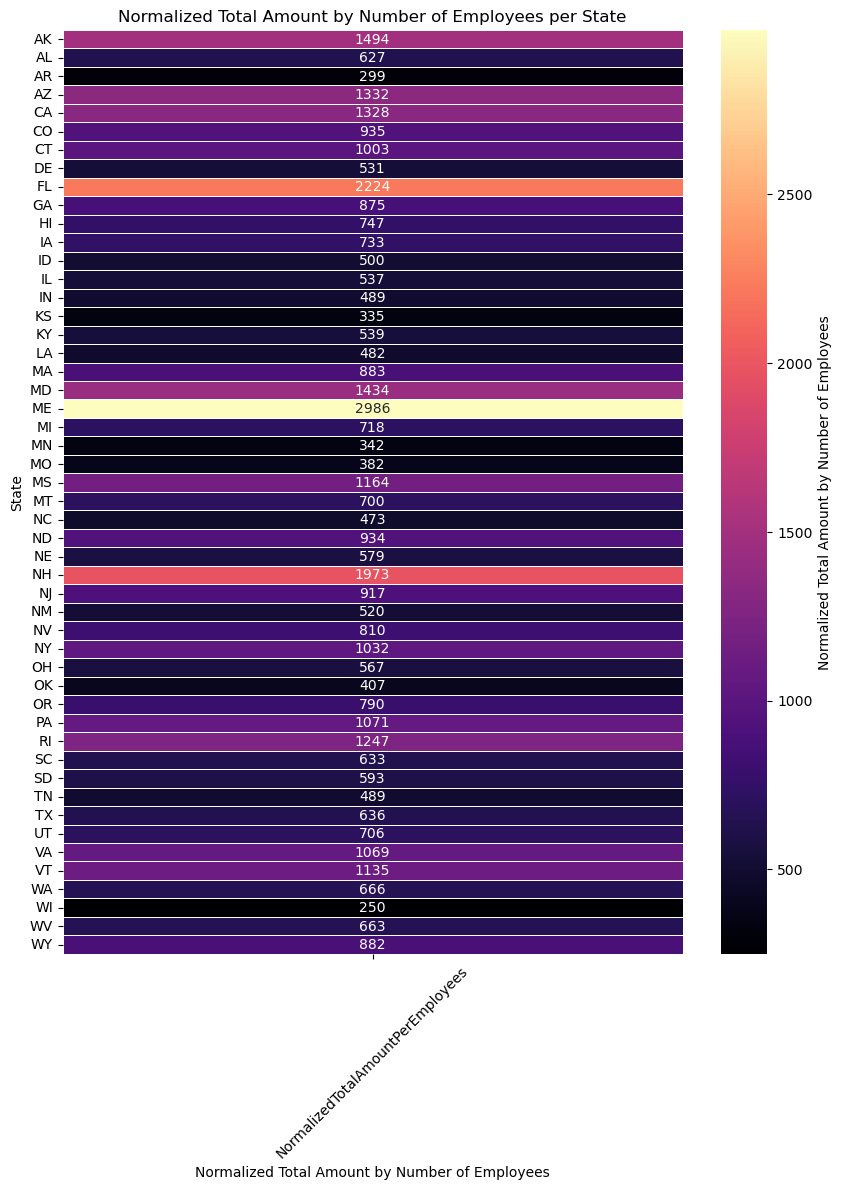

In [73]:
# Create the second heatmap for Normalized Total Amount by Number of Employees
new_cmap = sns.color_palette("plasma", as_cmap=True)
plt.figure(figsize=(10, 20))
heatmap_data_amount = merged_data.pivot_table(values='NormalizedTotalAmountPerEmployees', index='State', aggfunc='mean')
ax = sns.heatmap(heatmap_data_amount, cmap=new_cmap, linewidths=.5, fmt='.0f', annot=True, cbar_kws={'label': 'Normalized Total Amount by Number of Employees'}, annot_kws={"size": 16})
plt.xlabel('')
plt.ylabel('State', fontsize=20)  # Increase the fontsize for y-axis label
plt.xticks([])
plt.yticks(fontsize=16, rotation=0)  # Set the rotation to 0 to display the state names horizontally
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Normalized Total Amount by Number of Employees', fontsize=20)  # Set the label font size

# Save the plot as a JPG image
output_path = 'C:\\Users\\kosti\\OneDrive\\Desktop\\Data Engineering\\Homework2\\CovidRecovery\\RawData\\normalized_total_amount_employees_heatmap.jpg'
plt.savefig(output_path, bbox_inches='tight', format='jpg')
plt.show()

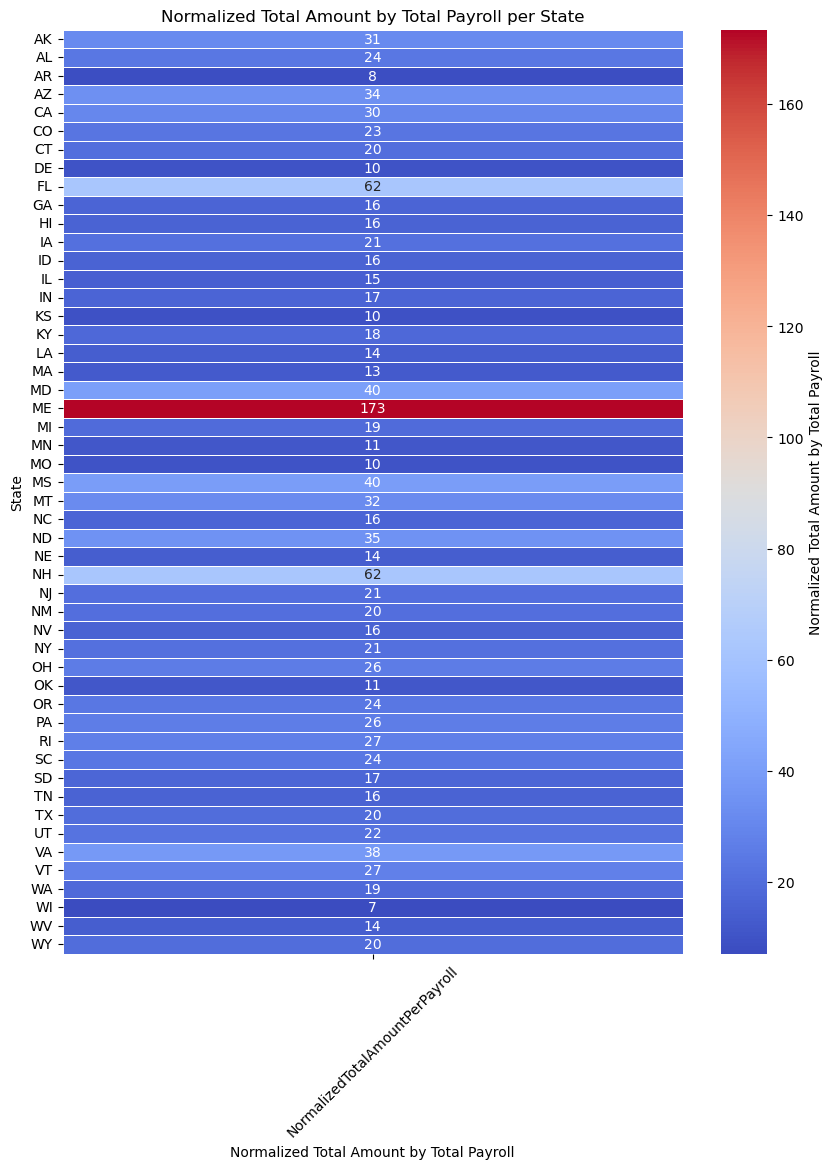

In [76]:
# Create the second heatmap for Normalized Total Amount Per Payroll
plt.figure(figsize=(10, 20))
heatmap_data_amount = merged_data.pivot_table(values='NormalizedTotalAmountPerPayroll', index='State', aggfunc='mean')
ax = sns.heatmap(heatmap_data_amount, cmap=new_cmap, linewidths=.5, annot=True, fmt='.0f', cbar_kws={'label': 'Normalized Total Amount by Total Payroll'}, annot_kws={"size": 16})
plt.xlabel('')
plt.ylabel('State', fontsize=20)  # Increase the fontsize for y-axis label
plt.xticks([])
plt.yticks(fontsize=16, rotation=0)  # Set the rotation to 0 to display the state names horizontally
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Normalized Total Amount by Total Payroll', fontsize=20)  # Set the label font size

# Save the plot as a JPG image
output_path = 'C:\\Users\\kosti\\OneDrive\\Desktop\\Data Engineering\\Homework2\\CovidRecovery\\RawData\\normalized_total_amount_payroll_heatmap.jpg'
plt.savefig(output_path, bbox_inches='tight', format='jpg')
plt.show()

In [ ]:
# Filter the "merged_data" DataFrame to take only the data which are about the NAICSCode 71 (arts, entertainment, and recreation)
filtered_data = merged_data[(merged_data['NAICSCode'] == '71') & (merged_data['State'].isin(['MI', 'NC']))]

In [ ]:
# Group by 'NAICSCode' and sum 'NormalizedTotalAmountPerPayroll'
grouped_data = merged_data.groupby('NAICSCode')['NormalizedTotalAmountPerPayroll'].sum().reset_index()

# Sort the DataFrame by 'NormalizedTotalAmountPerPayroll' in decreasing order
sorted_grouped_data = grouped_data.sort_values(by='NormalizedTotalAmountPerPayroll', ascending=False)

In [ ]:
print(sorted_grouped_data.head(2))

In [ ]:
print(sorted_grouped_data.tail(2))